In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_df(textfile):
    df = pd.read_csv(textfile, sep=r'\s+', header=None)
    return df

def find_ranges(df, col):
    ranges = []
    lows = sorted(df[col[0]].unique())
    highs = sorted(df[col[1]].unique())
    for low, high in zip(lows, highs):
        ranges.append((low, high))
    return ranges

def calculate_errors(ranges, truncate=None):
    midpoints = []
    xerr_low  = []
    xerr_high = []
    for (xlow, xhigh) in ranges:
        if truncate is not None:
            if xhigh > truncate: xhigh=truncate
            if xlow >= truncate: print(f"Can't truncate {xhigh} to {truncate}")
        xmid = (xlow + xhigh)/2
        midpoints.append(xmid)
        xerr_low.append(xmid - xlow)
        xerr_high.append(xhigh - xmid)
    
    return midpoints, xerr_low, xerr_high

print('Functions loaded.')

Functions loaded.


In [3]:
df_ele_id   = load_df('corrections/electron_id_sf.txt')
df_muon_id  = load_df('corrections/muon_id_sf.txt')
df_muon_iso = load_df('corrections/muon_iso_sf.txt')
df_pileup   = load_df('corrections/pileup_wt.txt')
df_jec      = load_df('corrections/jet_jec_sf.txt')
df_jer      = load_df('corrections/jet_jer_sf.txt')
df_sigmajer = load_df('corrections/jet_ptres_sf.txt')
display(df_ele_id)
print('Dataframes loaded.')

,0,1,2,3,4,5,6,7
0,2016postVFP_UL,-2.5,-2.0,10.0,20.0,1.024601,1.039711,1.054822
1,2016postVFP_UL,-2.5,-2.0,20.0,35.0,0.999609,1.015896,1.032183
2,2016postVFP_UL,-2.5,-2.0,35.0,50.0,1.004619,1.008838,1.013057
3,2016postVFP_UL,-2.5,-2.0,50.0,100.0,0.998897,1.003614,1.008332
4,2016postVFP_UL,-2.5,-2.0,100.0,1500.0,1.004960,1.027088,1.049216
...,...,...,...,...,...,...,...,...
215,2018_UL,2.0,2.5,20.0,35.0,0.973622,0.988685,1.003747
216,2018_UL,2.0,2.5,35.0,50.0,0.981954,0.985258,0.988562
217,2018_UL,2.0,2.5,50.0,100.0,0.975857,0.980117,0.984377
218,2018_UL,2.0,2.5,100.0,200.0,0.972655,0.985459,0.998263


Dataframes loaded.


## Lepton scale factors

In [4]:
def plot_lepton_sf(df, plotname):
    eta_ranges = find_ranges(df, [1, 2])
    for (eta_min, eta_max) in eta_ranges:
        df_eta_range = df[(df[1] >= eta_min) & (df[2] <= eta_max)]
        grouped_by_campaign = df_eta_range.groupby(0)
        
        plt.figure(figsize=(8, 3))

        for campaign, group in grouped_by_campaign:
            pt_ranges = find_ranges(group, [3, 4])

            # Calculate pt midpoints and errors using the function
            pt_midpoints, pt_xlow_errors, pt_xhigh_errors = calculate_errors(pt_ranges, truncate=300)

            sf_values = group[6].values
            sf_up_values = group[7].values
            sf_down_values = group[5].values

            # Ensure that the lengths match
            if len(sf_values) != len(pt_midpoints):
                print(f"Error: Length mismatch between sf_values and pt_midpoints for campaign {campaign}")
                continue  # Skip if there's a mismatch

            # Calculate y-errors (based on up and down values)
            yerr_up = sf_up_values - sf_values
            yerr_down = sf_values - sf_down_values

            # Plot the results
            plt.errorbar(pt_midpoints, sf_values,
                         yerr=[yerr_down, yerr_up],
                         xerr=[pt_xlow_errors, pt_xhigh_errors],
                         label=f"{campaign.replace('_UL', '')}", fmt='o', capsize=3)

        # Decorations:
        plt.xlabel(r"$p_T$ (GeV)", fontsize=14)
        plt.ylabel(plotname, fontsize=14)
        plt.ylim(0.80, 1.4)
        #plt.title(rf"{plotname}", fontsize=16)
        plt.tick_params(axis='both', which='both', top=True, right=True)
        legendheader = fr"{eta_min} < $|\eta|$ < {eta_max}"
        plt.legend(loc='upper right', fontsize=10, ncol=2, frameon=False)
        plt.axhline(y=1, color='k', linestyle='--', linewidth=1)
        plt.text(0.02, 0.82, 'CMS', fontsize=22, fontweight='bold', family='sans-serif', 
                 transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))
        plt.text(0.02, 0.72, legendheader, fontsize=12, family='sans-serif', 
                 transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))
        
        plotdir = os.path.join('plots', plotname.replace(' ', '_'))
        figname = plotname.replace(' ', '_')+str(eta_min)+'_'+str(eta_max)+'.png'
        fullfigname = os.path.join(plotdir, figname)
        os.makedirs(plotdir, exist_ok=True)
        plt.tight_layout()
        plt.savefig(fullfigname, dpi=150, bbox_inches='tight') 
        print(fullfigname+" created.")
        plt.show()

        #break  # Break out of eta-range loop (if needed for debugging)

plots/Electron_ID_SF/Electron_ID_SF-2.5_-2.0.png created.


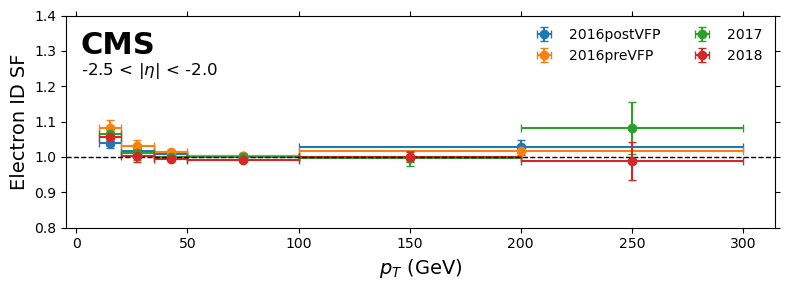

plots/Electron_ID_SF/Electron_ID_SF-2.0_-1.566.png created.


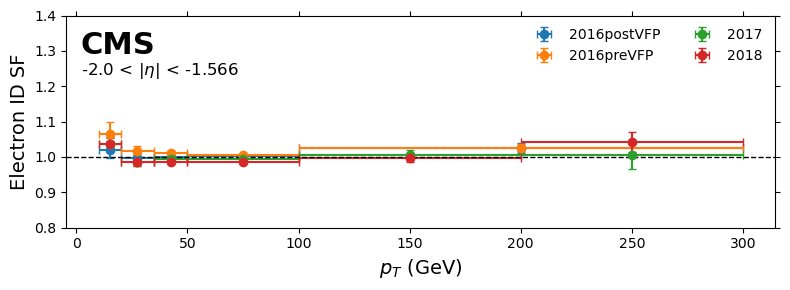

plots/Electron_ID_SF/Electron_ID_SF-1.566_-1.444.png created.


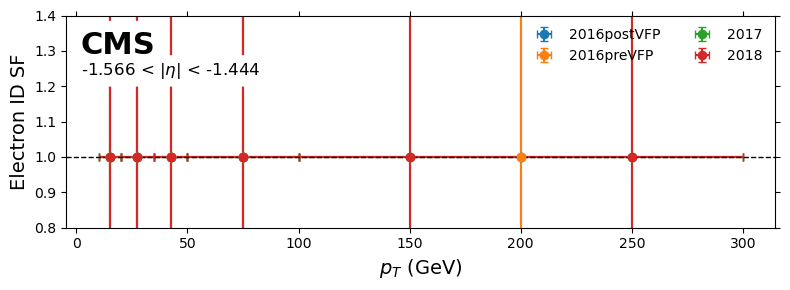

plots/Electron_ID_SF/Electron_ID_SF-1.444_-0.8.png created.


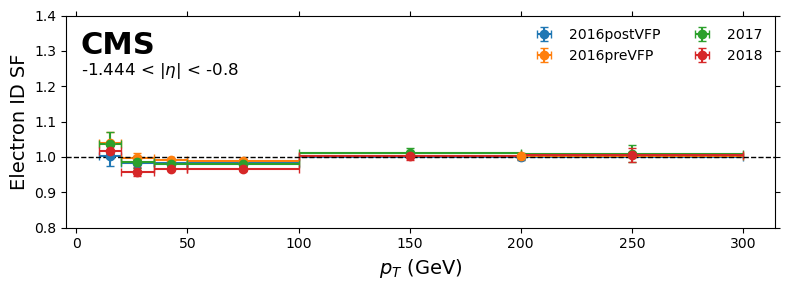

plots/Electron_ID_SF/Electron_ID_SF-0.8_0.0.png created.


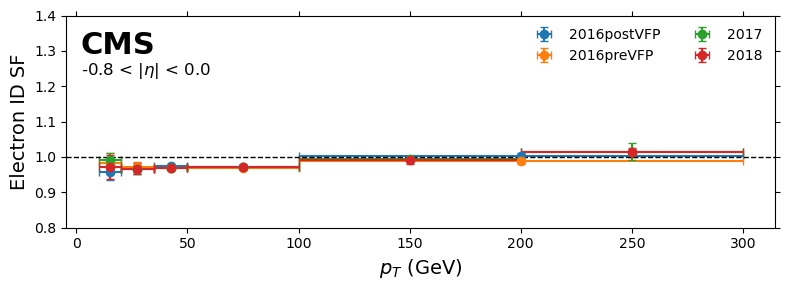

plots/Electron_ID_SF/Electron_ID_SF0.0_0.8.png created.


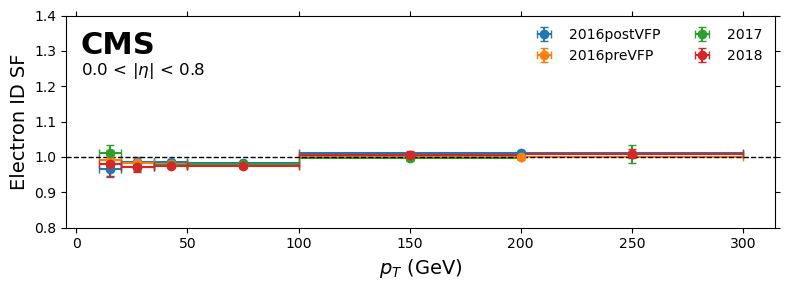

plots/Electron_ID_SF/Electron_ID_SF0.8_1.444.png created.


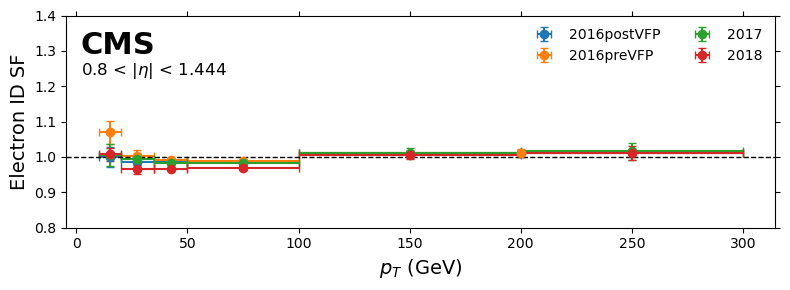

plots/Electron_ID_SF/Electron_ID_SF1.444_1.566.png created.


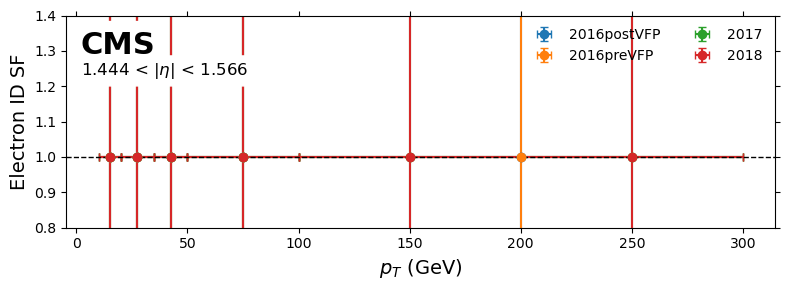

plots/Electron_ID_SF/Electron_ID_SF1.566_2.0.png created.


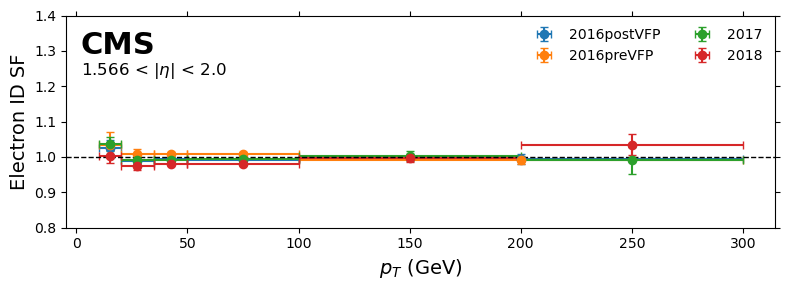

plots/Electron_ID_SF/Electron_ID_SF2.0_2.5.png created.


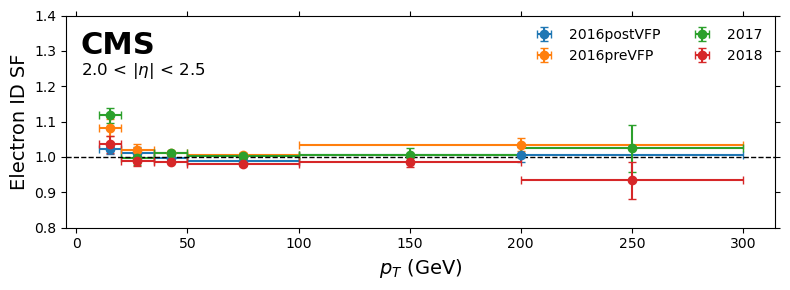

In [5]:
plot_lepton_sf(df_ele_id, "Electron ID SF")

plots/Muon_ID_SF/Muon_ID_SF0.0_0.9.png created.


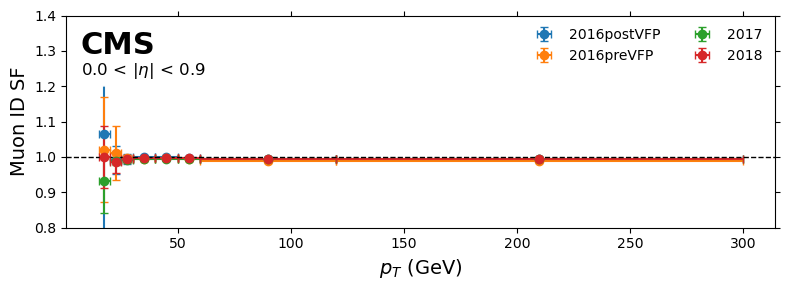

plots/Muon_ID_SF/Muon_ID_SF0.9_1.2.png created.


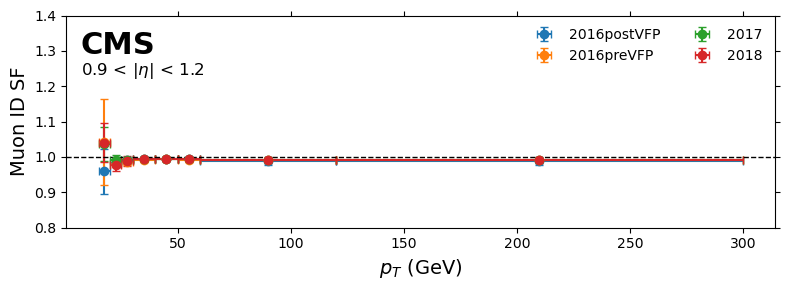

plots/Muon_ID_SF/Muon_ID_SF1.2_2.1.png created.


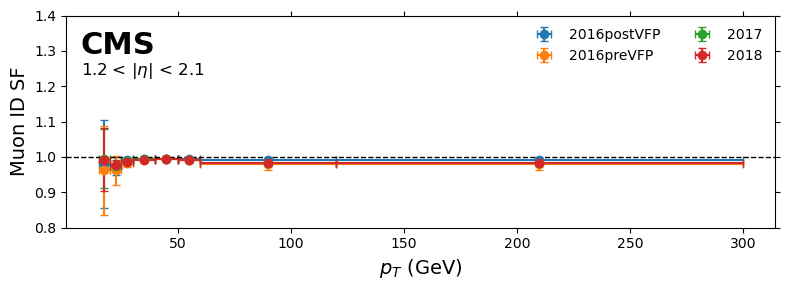

plots/Muon_ID_SF/Muon_ID_SF2.1_2.4.png created.


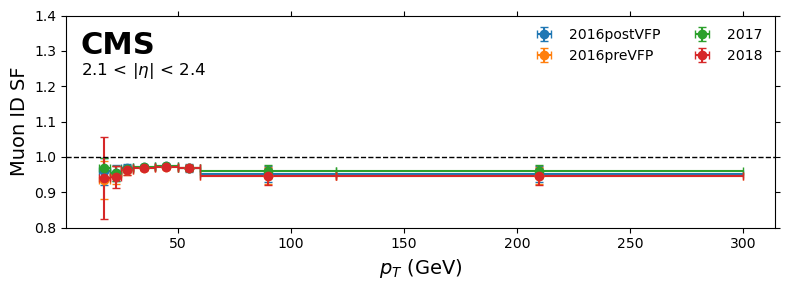

In [6]:
plot_lepton_sf(df_muon_id, "Muon ID SF")

plots/Muon_Iso_SF/Muon_Iso_SF0.0_0.9.png created.


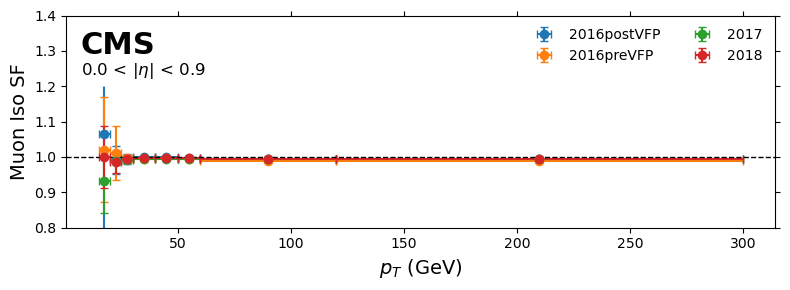

plots/Muon_Iso_SF/Muon_Iso_SF0.9_1.2.png created.


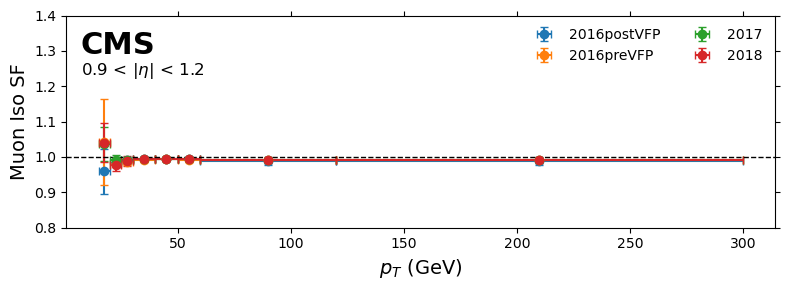

plots/Muon_Iso_SF/Muon_Iso_SF1.2_2.1.png created.


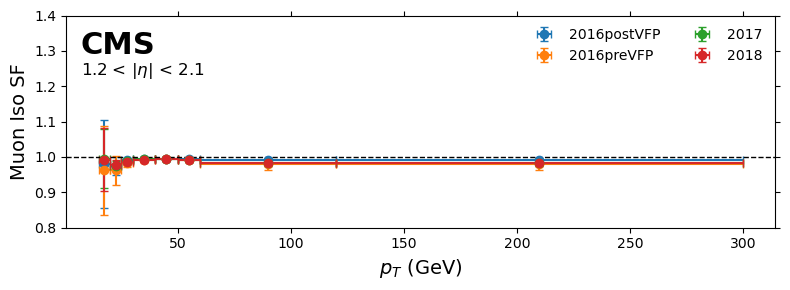

plots/Muon_Iso_SF/Muon_Iso_SF2.1_2.4.png created.


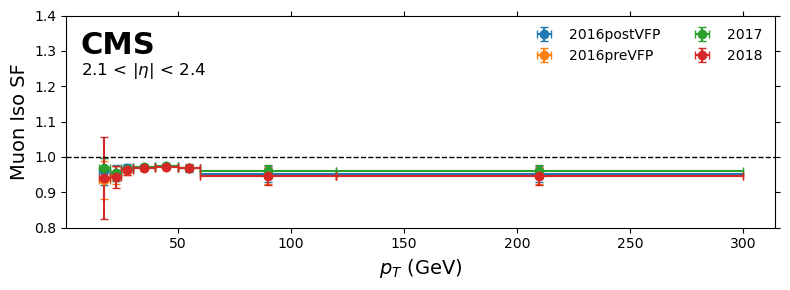

In [7]:
plot_lepton_sf(df_muon_id, "Muon Iso SF")

## Pileup weights

In [8]:
def plot_pileup_wt(df, plotname):
    df_grouped = df.groupby(0)

    plt.figure(figsize=(8, 3))

    for campaign, group in df_grouped:
        nint   = group[1].values
        wtdown = group[2].values
        wt     = group[3].values
        wtup   = group[4].values

        # Masking absurd values:
        mask = (
            (wt >= 0.01) & (wt <= 2) & 
            (wtdown >= 0.01) & (wtup <= 3) &
            ~((wt == 1.0) & (wtdown == 1.0) & (wtup == 1.0)) #Rejecting default values
        )
            
        # Apply the mask to filter the data
        nint = nint[mask]
        wtdown = wtdown[mask]
        wt = wt[mask]
        wtup = wtup[mask]

        yerr_up = abs(wtup - wt)
        yerr_down = abs(wt - wtdown)
        xerr = np.ones_like(nint)

        plt.errorbar(nint, wt,
                     yerr=[yerr_down, yerr_up],
                     xerr=xerr,
                     label=f"{campaign.replace('_UL', '')}", fmt='o', capsize=3)

    # Decorations:
    plt.xlabel(r"nTrueInteractions", fontsize=14)
    plt.ylabel(plotname, fontsize=14)
    plt.ylim(-0.5, 4)
    plt.tick_params(axis='both', which='both', top=True, right=True)
    #plt.title(rf"{plotname}", fontsize=16)
    legendheader = fr""
    plt.legend(loc='upper right', fontsize=10, ncol=2, frameon=False)
    plt.axhline(y=1, color='k', linestyle='--', linewidth=1)
    plt.text(0.02, 0.82, 'CMS', fontsize=22, fontweight='bold', family='sans-serif', 
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))
    plt.text(0.02, 0.72, legendheader, fontsize=12, family='sans-serif', 
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))

    plotdir = os.path.join('plots', plotname.replace(' ', '_'))
    figname = plotname.replace(' ', '_')+'.png'
    fullfigname = os.path.join(plotdir, figname)
    os.makedirs(plotdir, exist_ok=True)
    plt.tight_layout()
    plt.savefig(fullfigname, dpi=150, bbox_inches='tight') 
    print(fullfigname+" created.")
    plt.show()
            

plots/Pileup_weight/Pileup_weight.png created.


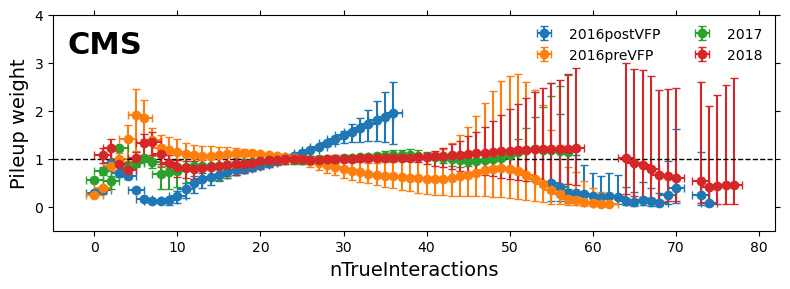

In [9]:
plot_pileup_wt(df_pileup, "Pileup weight")

## Jet corrections: JEC

In [10]:
def plot_jec_sf(df, plotname):
    eta_ranges = find_ranges(df, [1, 2])
    for (eta_min, eta_max) in eta_ranges:
        df_eta_range = df[(df[1] >= eta_min) & (df[2] <= eta_max)]
        grouped_by_campaign = df_eta_range.groupby(0)
        
        plt.figure(figsize=(8, 3))

        for campaign, group in grouped_by_campaign:
            pt_ranges = find_ranges(group, [3, 4])

            # Calculate pt midpoints and errors using the function
            pt_midpoints, pt_xlow_errors, pt_xhigh_errors = calculate_errors(pt_ranges)

            sf_values = group[6].values
            sf_up_values = group[7].values
            sf_down_values = group[5].values

            # Ensure that the lengths match
            if len(sf_values) != len(pt_midpoints):
                print(f"Error: Length mismatch between sf_values and pt_midpoints for campaign {campaign}")
                continue  # Skip if there's a mismatch

            # Calculate y-errors (based on up and down values)
            yerr_up = sf_up_values - sf_values
            yerr_down = sf_values - sf_down_values

            # Plot the results
            plt.errorbar(pt_midpoints, sf_values,
                         yerr=[yerr_down, yerr_up],
                         xerr=[pt_xlow_errors, pt_xhigh_errors],
                         label=f"{campaign.replace('_UL', '')}", fmt='o', capsize=3)

        # Decorations:
        plt.xlabel(r"$p_T$ (GeV)", fontsize=14)
        plt.ylabel(plotname, fontsize=14)
        plt.ylim(0.80, 1.4)
        plt.xlim(0.0, 1000)
        plt.tick_params(axis='both', which='both', top=True, right=True)
        #plt.title(rf"{plotname}", fontsize=16)
        legendheader = fr"{eta_min} < $|\eta|$ < {eta_max}"
        plt.legend(loc='upper right', fontsize=10, ncol=2, frameon=False)
        plt.axhline(y=1, color='k', linestyle='--', linewidth=1)
        plt.text(0.02, 0.82, 'CMS', fontsize=22, fontweight='bold', family='sans-serif', 
                 transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))
        plt.text(0.02, 0.72, legendheader, fontsize=12, family='sans-serif', 
                 transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))

        plotdir = os.path.join('plots', plotname.replace(' ', '_'))
        figname = plotname.replace(' ', '_')+str(eta_min)+'_'+str(eta_max)+'.png'
        fullfigname = os.path.join(plotdir, figname)
        os.makedirs(plotdir, exist_ok=True)
        plt.tight_layout()
        plt.savefig(fullfigname, dpi=150, bbox_inches='tight') 
        print(fullfigname+" created.")
        plt.show()

        #break  # Break out of eta-range loop (if needed for debugging)

plots/JEC_SF/JEC_SF-5.4_-5.0.png created.


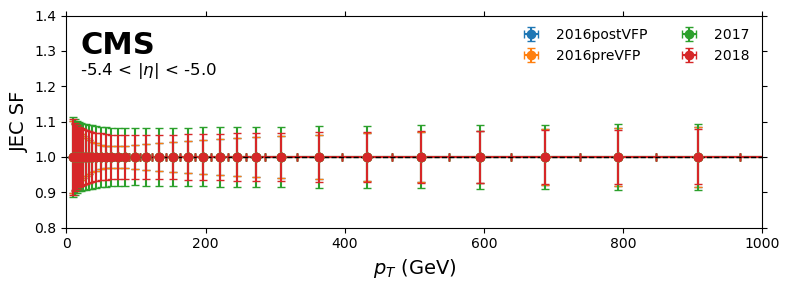

plots/JEC_SF/JEC_SF-5.0_-4.4.png created.


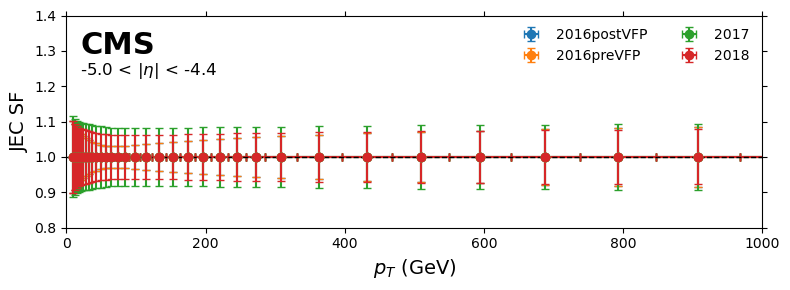

plots/JEC_SF/JEC_SF-4.4_-4.0.png created.


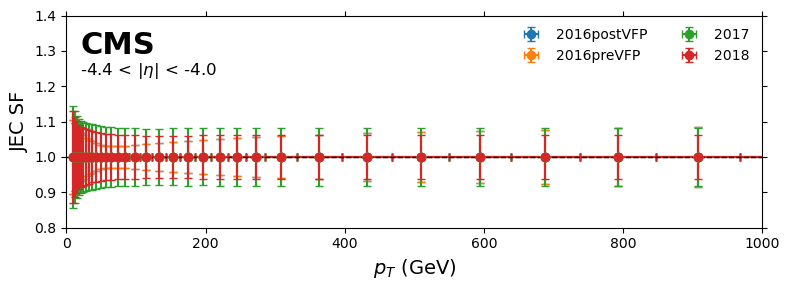

plots/JEC_SF/JEC_SF-4.0_-3.5.png created.


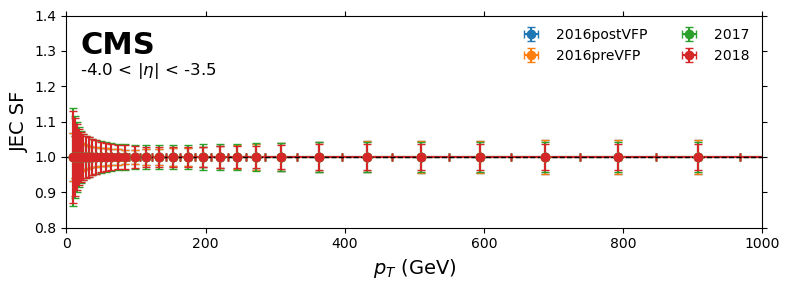

plots/JEC_SF/JEC_SF-3.5_-3.0.png created.


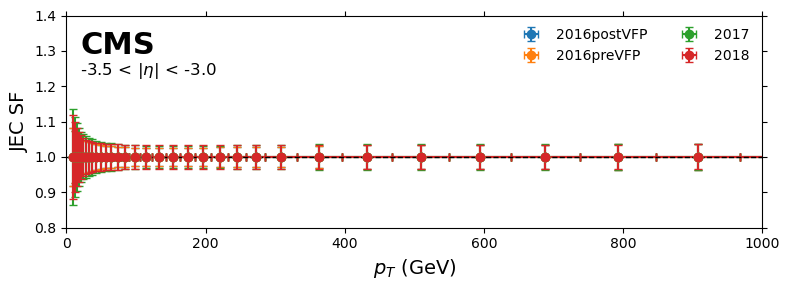

plots/JEC_SF/JEC_SF-3.0_-2.8.png created.


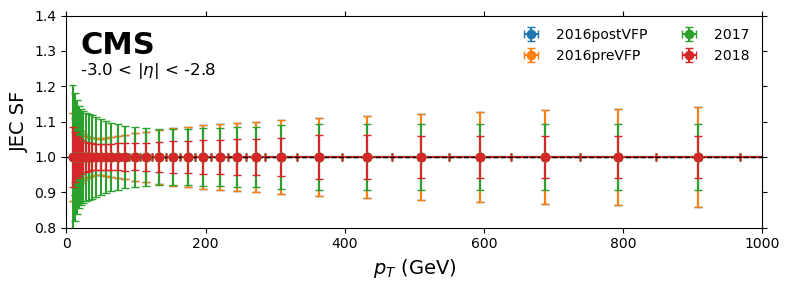

plots/JEC_SF/JEC_SF-2.8_-2.6.png created.


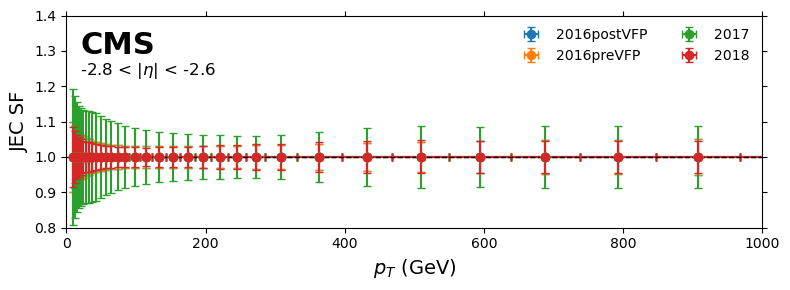

plots/JEC_SF/JEC_SF-2.6_-2.4.png created.


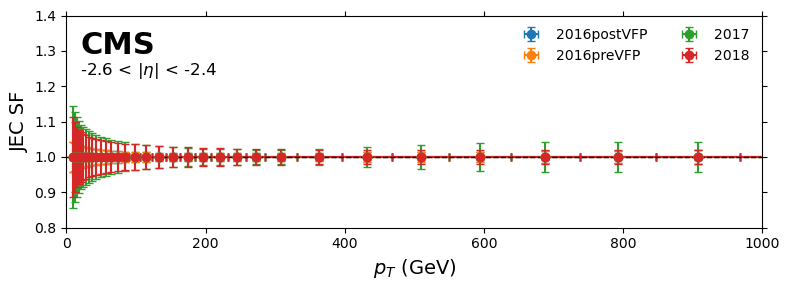

plots/JEC_SF/JEC_SF-2.4_-2.2.png created.


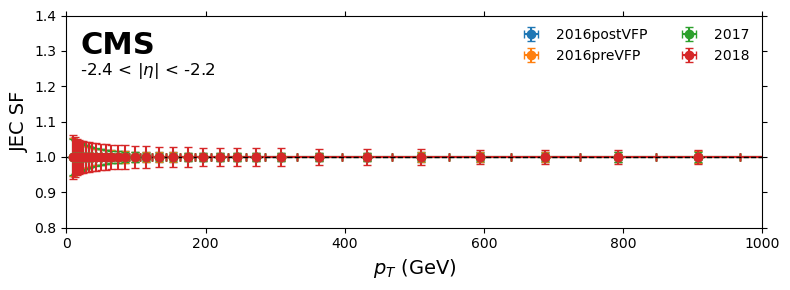

plots/JEC_SF/JEC_SF-2.2_-2.0.png created.


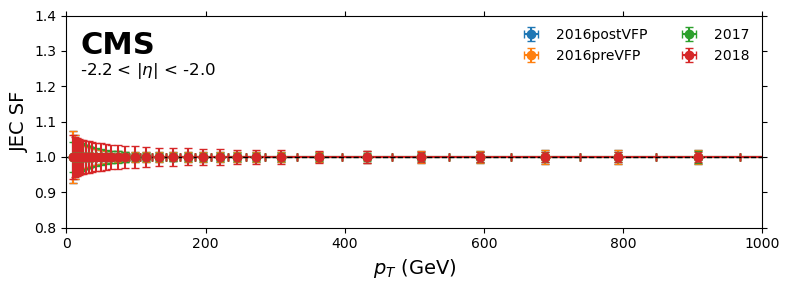

plots/JEC_SF/JEC_SF-2.0_-1.8.png created.


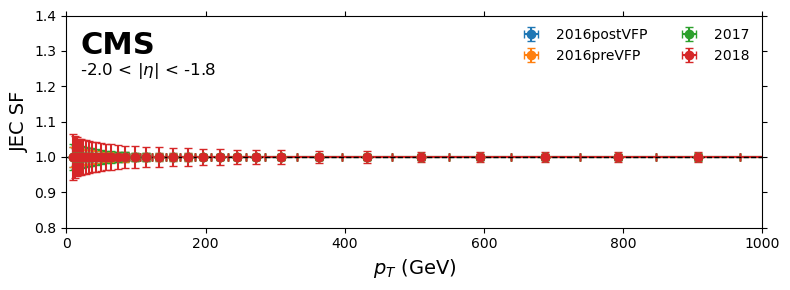

plots/JEC_SF/JEC_SF-1.8_-1.6.png created.


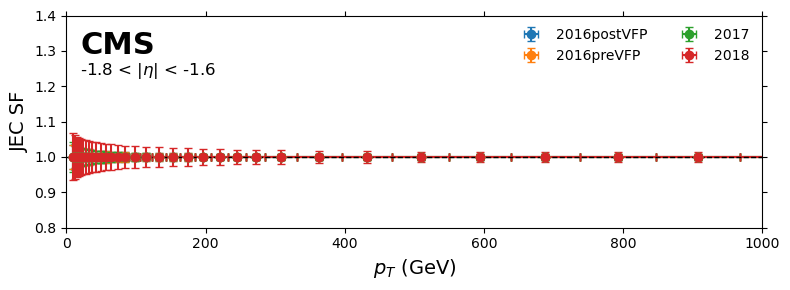

plots/JEC_SF/JEC_SF-1.6_-1.4.png created.


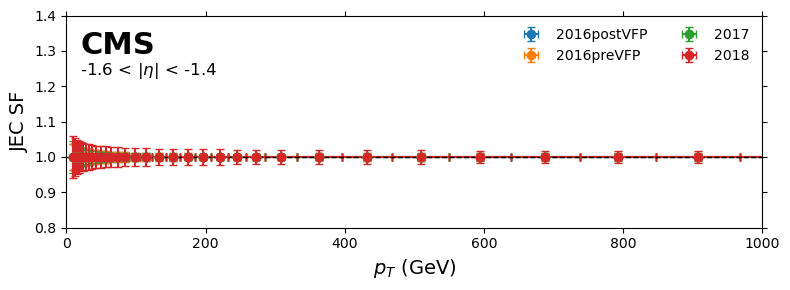

plots/JEC_SF/JEC_SF-1.4_-1.2.png created.


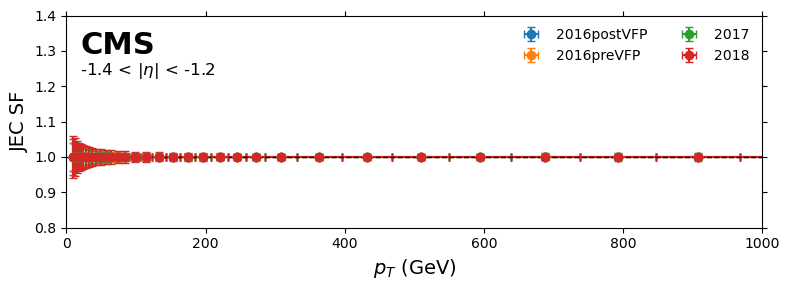

plots/JEC_SF/JEC_SF-1.2_-1.0.png created.


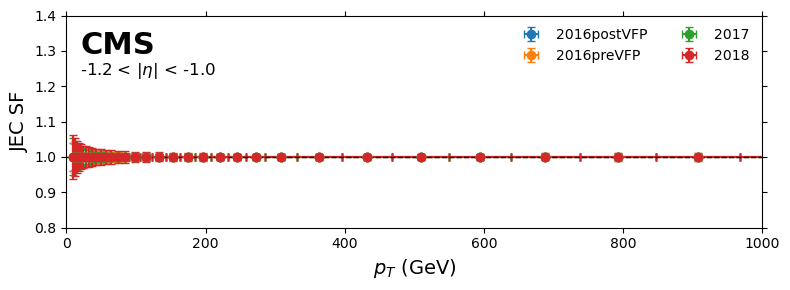

plots/JEC_SF/JEC_SF-1.0_-0.8.png created.


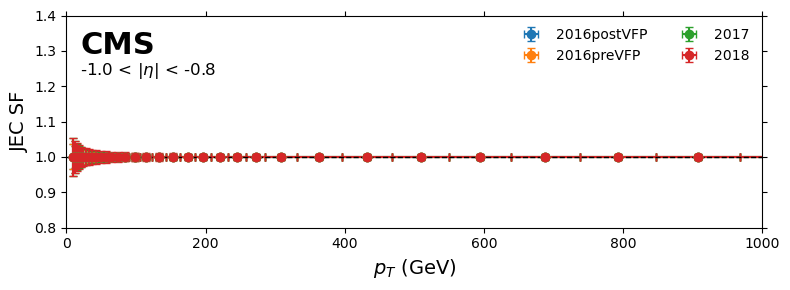

plots/JEC_SF/JEC_SF-0.8_-0.6.png created.


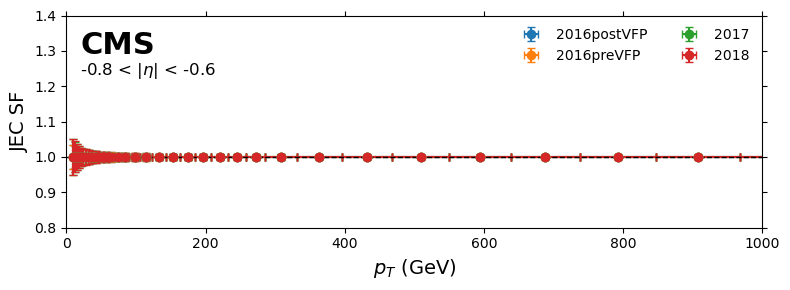

plots/JEC_SF/JEC_SF-0.6_-0.4.png created.


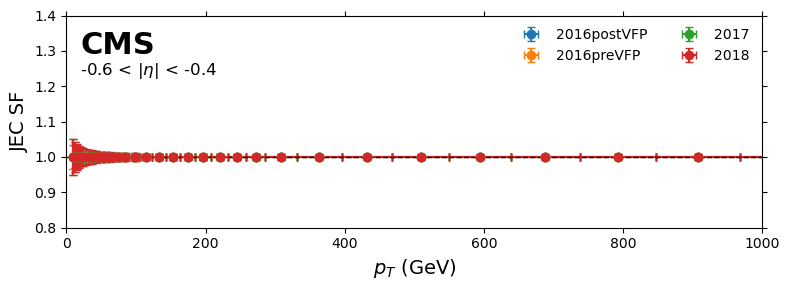

plots/JEC_SF/JEC_SF-0.4_-0.2.png created.


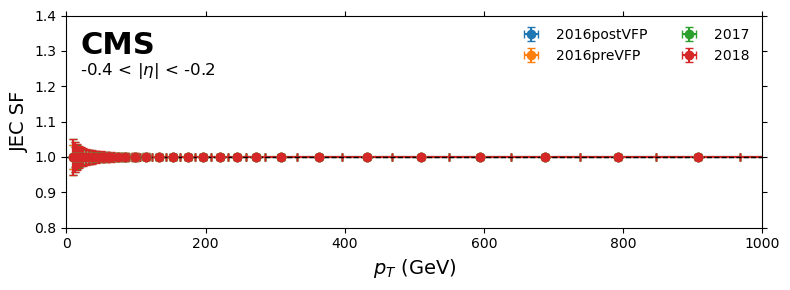

plots/JEC_SF/JEC_SF-0.2_0.0.png created.


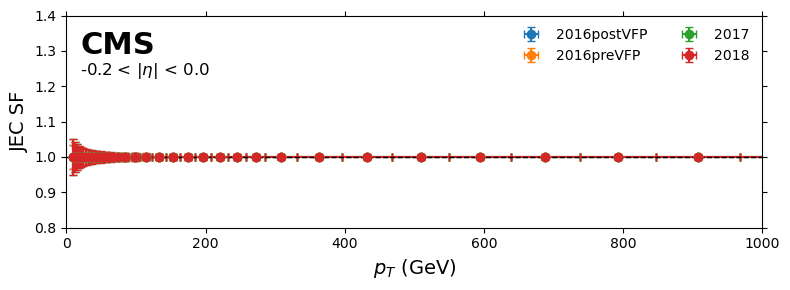

plots/JEC_SF/JEC_SF0.0_0.2.png created.


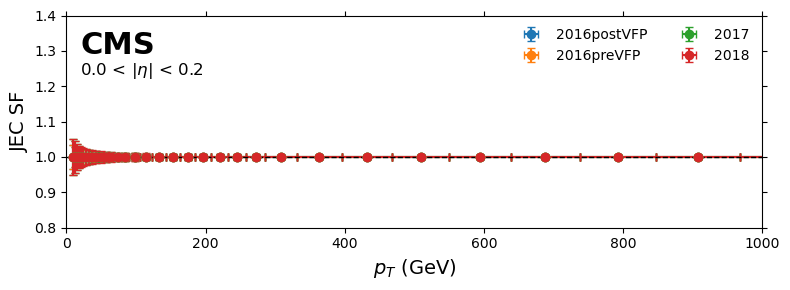

plots/JEC_SF/JEC_SF0.2_0.4.png created.


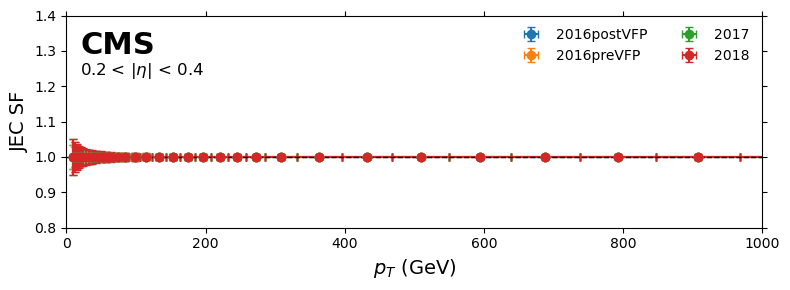

plots/JEC_SF/JEC_SF0.4_0.6.png created.


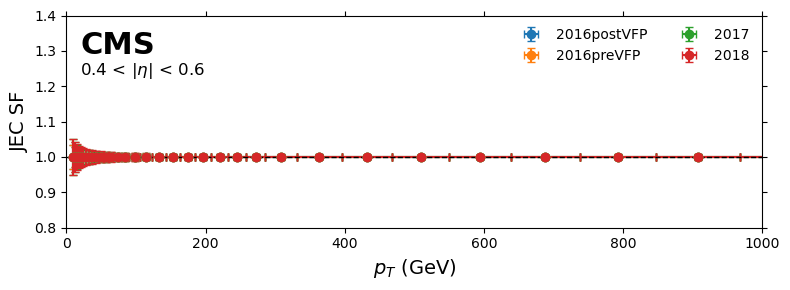

plots/JEC_SF/JEC_SF0.6_0.8.png created.


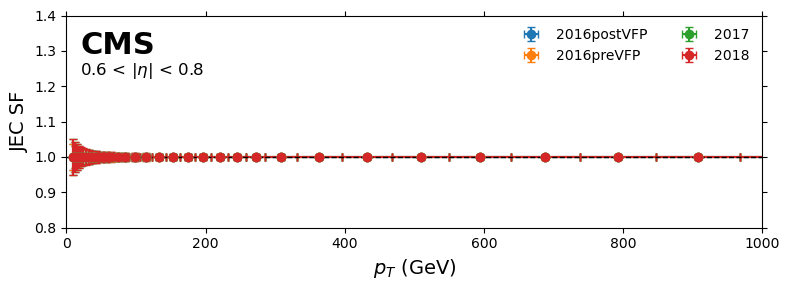

plots/JEC_SF/JEC_SF0.8_1.0.png created.


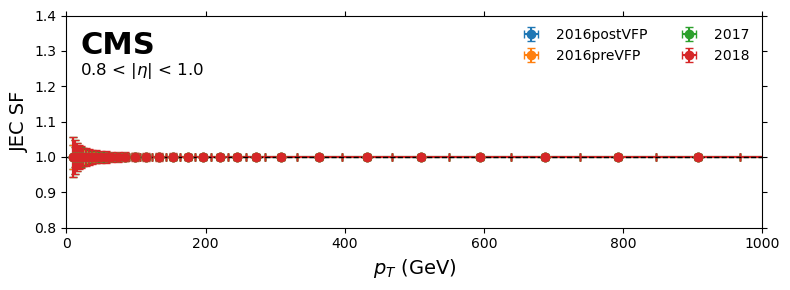

plots/JEC_SF/JEC_SF1.0_1.2.png created.


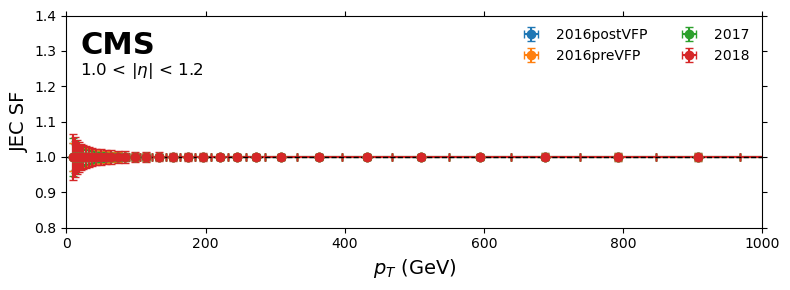

plots/JEC_SF/JEC_SF1.2_1.4.png created.


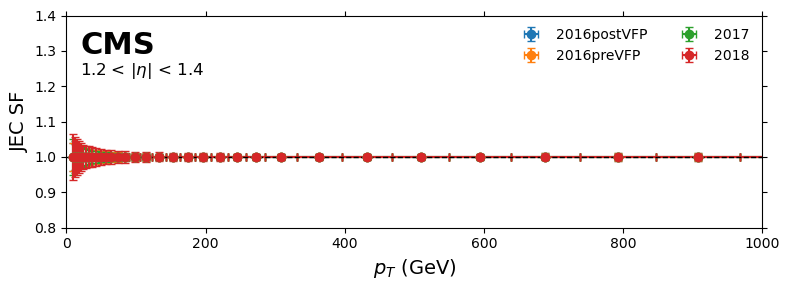

plots/JEC_SF/JEC_SF1.4_1.6.png created.


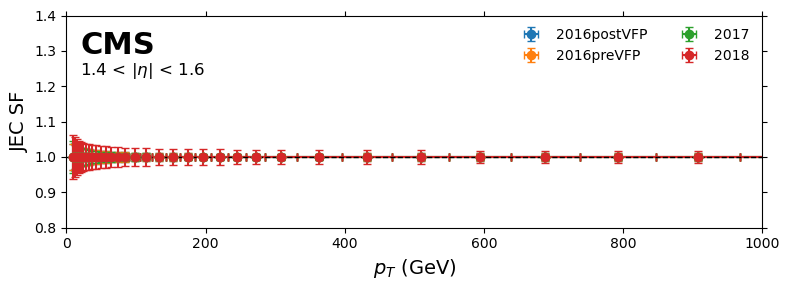

plots/JEC_SF/JEC_SF1.6_1.8.png created.


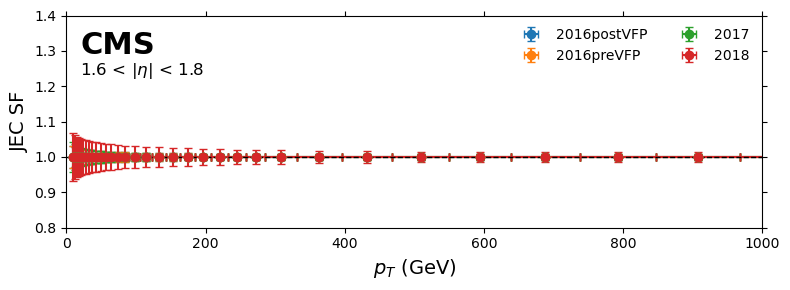

plots/JEC_SF/JEC_SF1.8_2.0.png created.


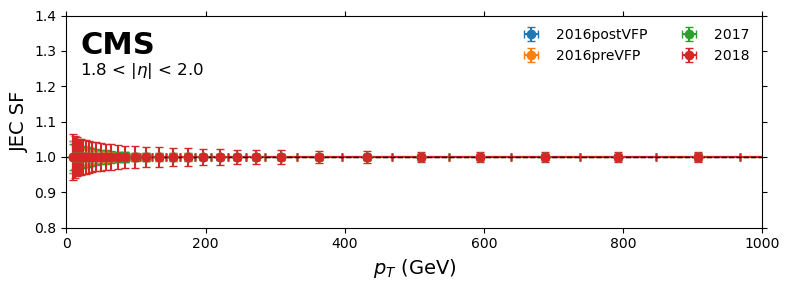

plots/JEC_SF/JEC_SF2.0_2.2.png created.


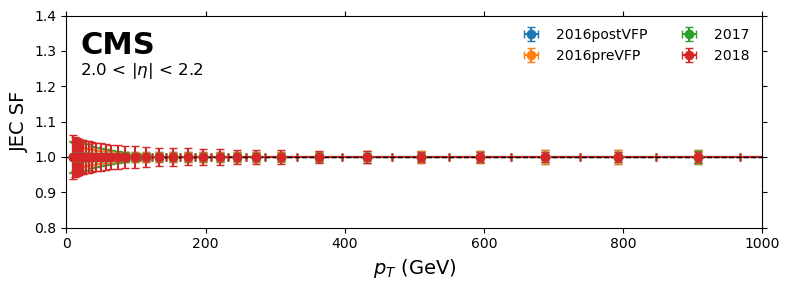

plots/JEC_SF/JEC_SF2.2_2.4.png created.


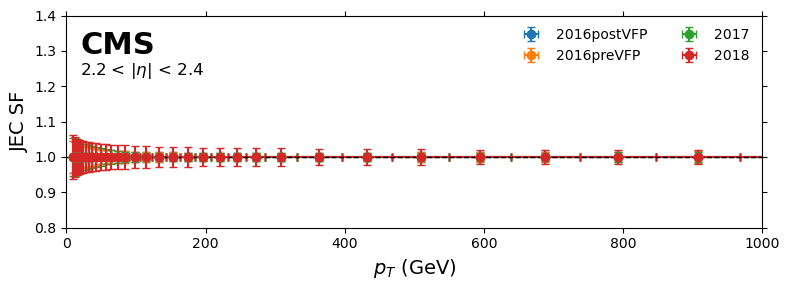

plots/JEC_SF/JEC_SF2.4_2.6.png created.


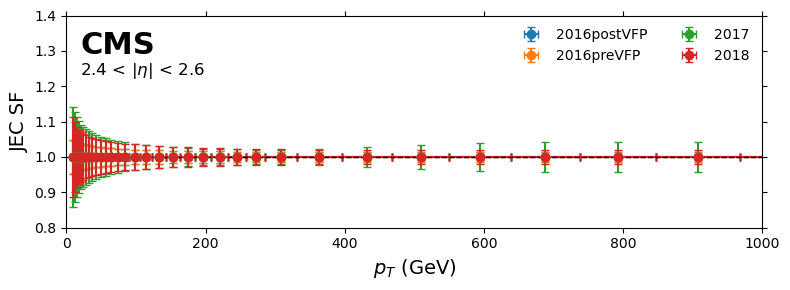

plots/JEC_SF/JEC_SF2.6_2.8.png created.


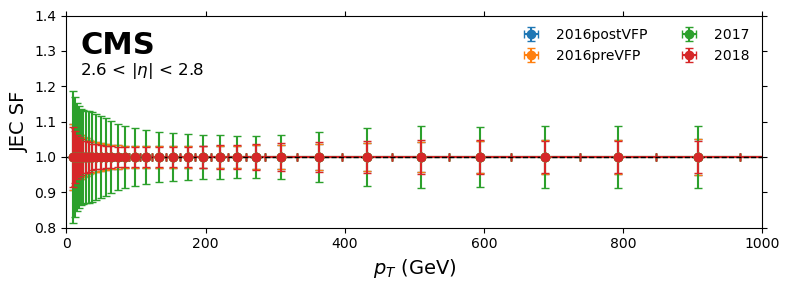

plots/JEC_SF/JEC_SF2.8_3.0.png created.


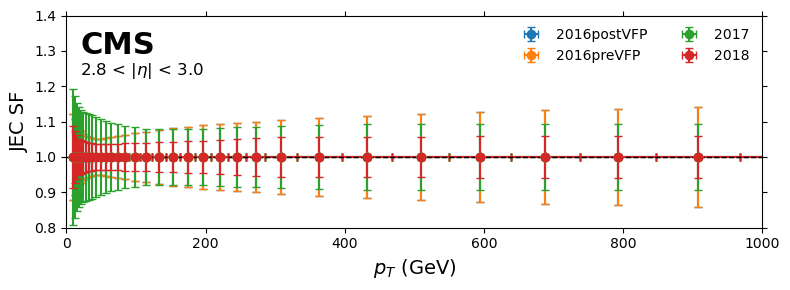

plots/JEC_SF/JEC_SF3.0_3.5.png created.


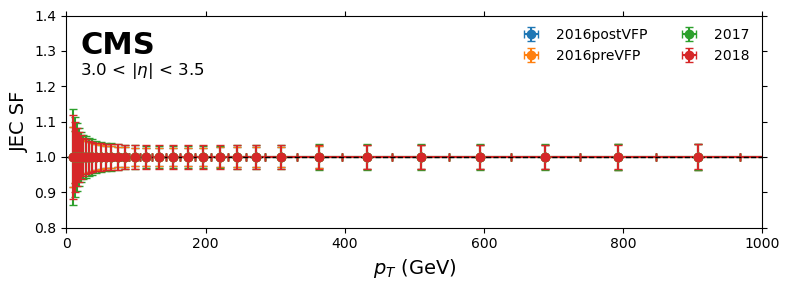

plots/JEC_SF/JEC_SF3.5_4.0.png created.


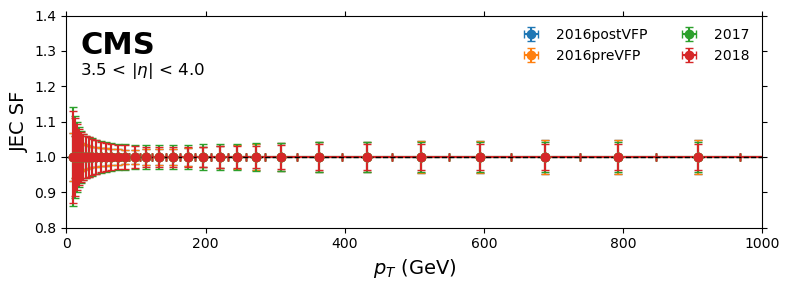

plots/JEC_SF/JEC_SF4.0_4.4.png created.


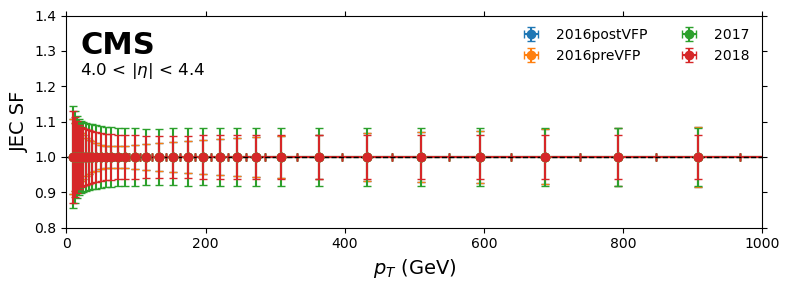

plots/JEC_SF/JEC_SF4.4_5.0.png created.


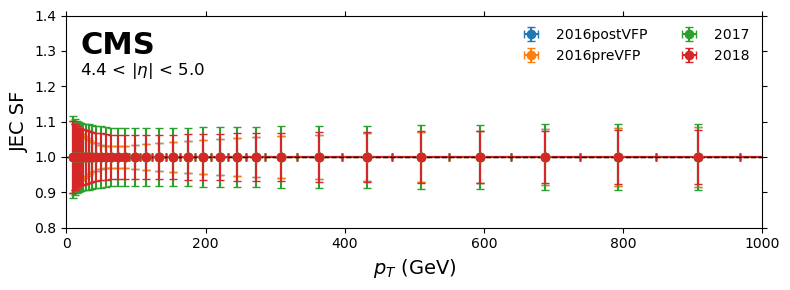

plots/JEC_SF/JEC_SF5.0_5.4.png created.


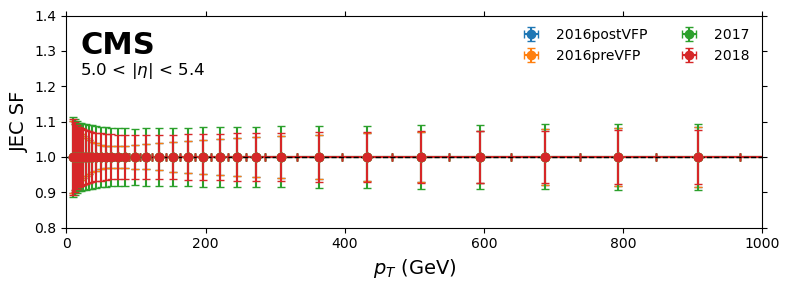

In [11]:
plot_jec_sf(df_jec, "JEC SF")

## Jet corrections: JER

In [12]:
def plot_jer_sf(df, plotname):

    plt.figure(figsize=(8, 3))

    grouped_by_campaign = df.groupby(0)
    for campaign, group in grouped_by_campaign:
        eta_ranges = find_ranges(group, [1, 2])
        eta_midpoints, eta_xlow_errors, eta_xhigh_errors = calculate_errors(eta_ranges)

        sf_values = group[4].values
        sf_up_values = group[5].values
        sf_down_values = group[3].values

        yerr_up = sf_up_values - sf_values
        yerr_down = sf_values - sf_down_values
        
        plt.errorbar(eta_midpoints, sf_values,
                     yerr=[yerr_down, yerr_up],
                     xerr=[eta_xlow_errors, eta_xhigh_errors],
                     label=f"{campaign.replace('_UL', '')}", fmt='o', capsize=3)

    plt.xlabel(r"$\eta$", fontsize=14)
    plt.ylabel(plotname, fontsize=14)
    plt.ylim(0.80, 2)
    plt.xlim(-5, 5)
    plt.tick_params(axis='both', which='both', top=True, right=True)
    #plt.title(rf"{plotname}", fontsize=16)
    legendheader = fr""
    plt.legend(loc='upper right', fontsize=10, ncol=2, frameon=False)
    plt.axhline(y=1, color='k', linestyle='--', linewidth=1)
    plt.text(0.02, 0.82, 'CMS', fontsize=22, fontweight='bold', family='sans-serif', 
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))
    plt.text(0.02, 0.72, legendheader, fontsize=12, family='sans-serif', 
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))

    plotdir = os.path.join('plots', plotname.replace(' ', '_'))
    figname = plotname.replace(' ', '_')+'.png'
    fullfigname = os.path.join(plotdir, figname)
    os.makedirs(plotdir, exist_ok=True)
    plt.tight_layout()
    plt.savefig(fullfigname, dpi=150, bbox_inches='tight') 
    print(fullfigname+" created.")
    plt.show()

plots/JER_SF/JER_SF.png created.


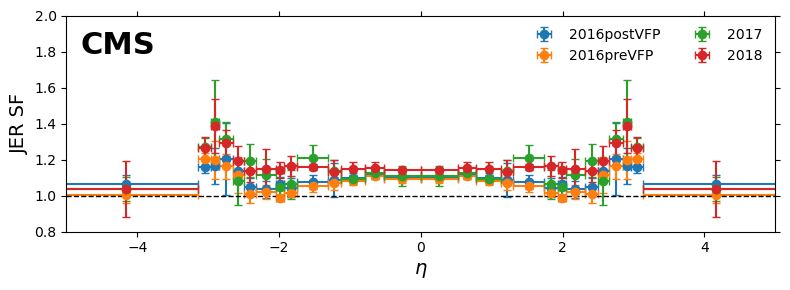

In [13]:
plot_jer_sf(df_jer, "JER SF")

In [14]:
def plot_sigmajer_sf(df, plotname):
    # Get the defined eta ranges
    eta_ranges = find_ranges(df, [1, 2])
    
    for (eta_min, eta_max) in eta_ranges:
        df_eta_range = df[(df[1] >= eta_min) & (df[2] <= eta_max)]

        num_campaigns = len(df_eta_range.groupby(0))
        fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex=False, sharey=False)
        
        if num_campaigns == 1:   axs = np.array([axs])
        elif num_campaigns == 2: axs = np.array([axs[0], axs[1]])
        else:                    axs = axs.flatten()

        grouped_by_campaign = df_eta_range.groupby(0)
        
        for idx, (campaign, group) in enumerate(grouped_by_campaign):
            ax = axs[idx]

            # Calculate pt and rho ranges for the current campaign
            pt_ranges = find_ranges(group, [3, 4])
            rho_ranges = find_ranges(group, [5, 6])

            # Prepare a 2D grid for plotting
            heatmap = np.zeros((len(pt_ranges), len(rho_ranges)))

            for i, (pt_min, pt_max) in enumerate(pt_ranges):
                for j, (rho_min, rho_max) in enumerate(rho_ranges):
                    # Filter data by pt and rho ranges
                    subset = group[(group[3] >= pt_min) & (group[4] <= pt_max) &
                                   (group[5] >= rho_min) & (group[6] <= rho_max)]
                    
                    if not subset.empty: heatmap[i, j] = subset[7].values[0]
                    else:                heatmap[i, j] = np.nan

            im = ax.imshow(
                heatmap.T,  # Transpose to match the axis
                extent=(pt_ranges[0][0], pt_ranges[-1][1], rho_ranges[0][0], rho_ranges[-1][1]),
                origin='lower',
                aspect='auto',
                cmap='coolwarm',  # Apply chosen colormap
                vmin=0.1,
                vmax=0.6,
            )
            
            ax.set_title(f"{campaign.replace('_UL', '')}", fontsize=14)
            ax.set_xlabel(r"$p_T$ (GeV)", fontsize=12)
            #ax.set_ylabel(r"$\rho (GeV)$", fontsize=12)
            ax.set_ylabel(r"$\rho \, (\mathrm{GeV}/\Delta\eta x \Delta\phi)$", fontsize=12)

            ax.set_xlim(0, 1000)
            ax.set_xticks([0, 200, 400, 600, 800, 1000])
            ax.set_yticks([rho[0] for rho in rho_ranges] + [rho[1] for rho in rho_ranges])
            ax.set_yticks(np.linspace(rho_ranges[0][0], rho_ranges[-1][1], 5))

            # Adjust the tick label size to prevent overlap
            for label in ax.get_xticklabels() + ax.get_yticklabels(): label.set_fontsize(10)
            ax.tick_params(axis='x', which='both', labelsize=10)
            ax.tick_params(axis='y', which='both', labelsize=10)
            ax.text(0.02, 0.82, 'CMS', fontsize=22, fontweight='bold', transform=ax.transAxes)
            ax.tick_params(axis='both', which='both', top=True, right=True)
        
        plt.tight_layout(rect=[0, 0, 1, 0.92]) 

        #fig.subplots_adjust(top=0.85)
        fig.text(0.32, 0.92, fr'$\sigma$ JER (${eta_min}<\eta<{eta_max}$)', fontsize=15, family='sans-serif',)
        
        # Add a colorbar for the entire figure (applies to all subplots)
        fig.colorbar(im, ax=axs)

        # Save the figure to the appropriate directory
        plotdir = os.path.join('plots', plotname.replace(' ', '_'))
        figname = plotname.replace(' ', '_') + f'_{eta_min}_{eta_max}.png'
        fullfigname = os.path.join(plotdir, figname)
        os.makedirs(plotdir, exist_ok=True)
        plt.savefig(fullfigname, dpi=150, bbox_inches='tight') 
        print(fullfigname + " created.")
        plt.show()
        plt.clf()  # Clear the figure for the next plot

        #break

plots/sigma_JER/sigma_JER_-4.7_-3.2.png created.


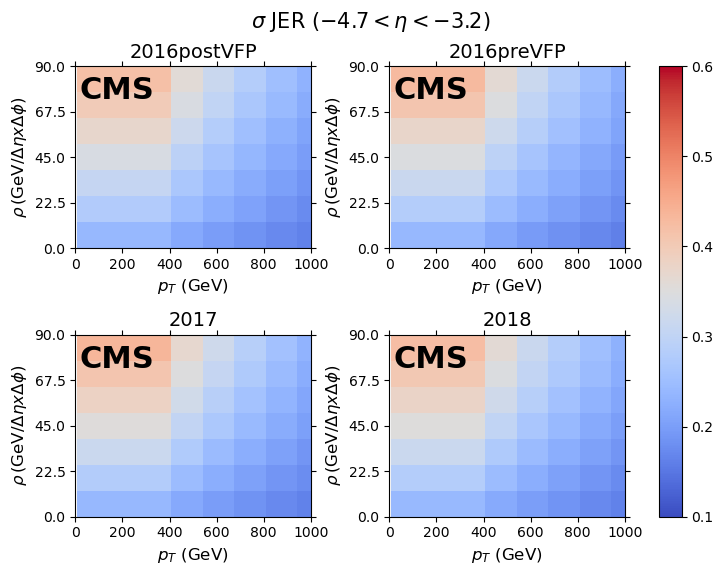

plots/sigma_JER/sigma_JER_-3.2_-3.0.png created.


<Figure size 640x480 with 0 Axes>

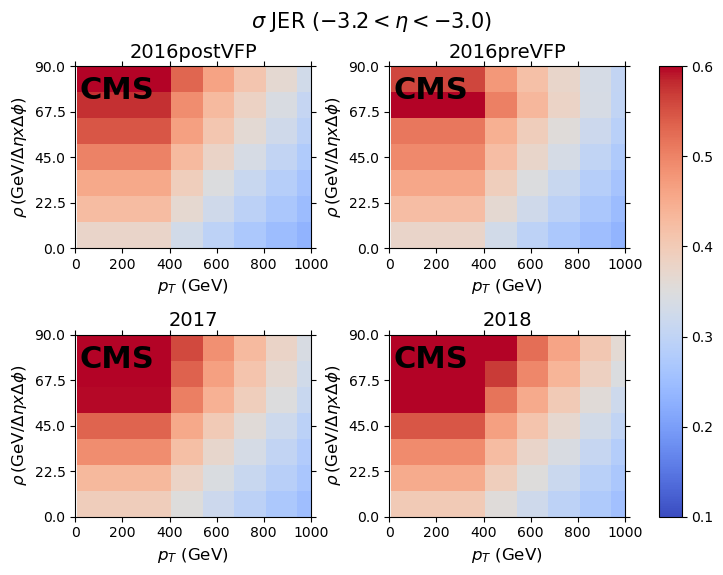

plots/sigma_JER/sigma_JER_-3.0_-2.8.png created.


<Figure size 640x480 with 0 Axes>

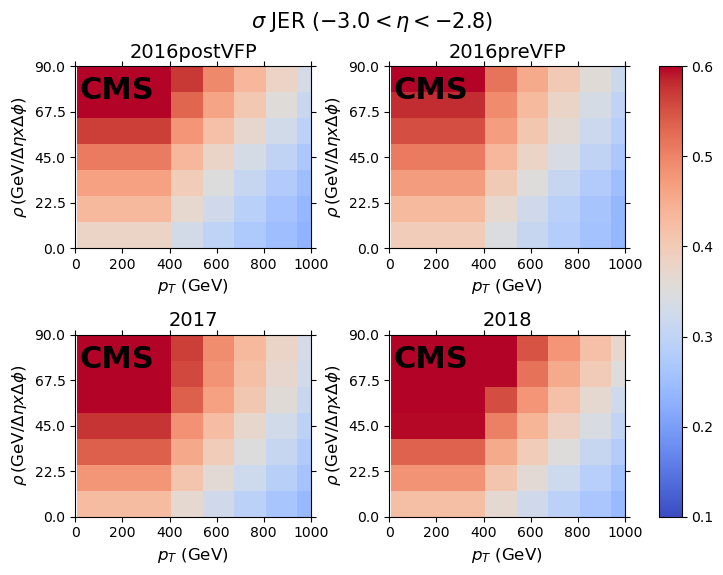

plots/sigma_JER/sigma_JER_-2.8_-2.5.png created.


<Figure size 640x480 with 0 Axes>

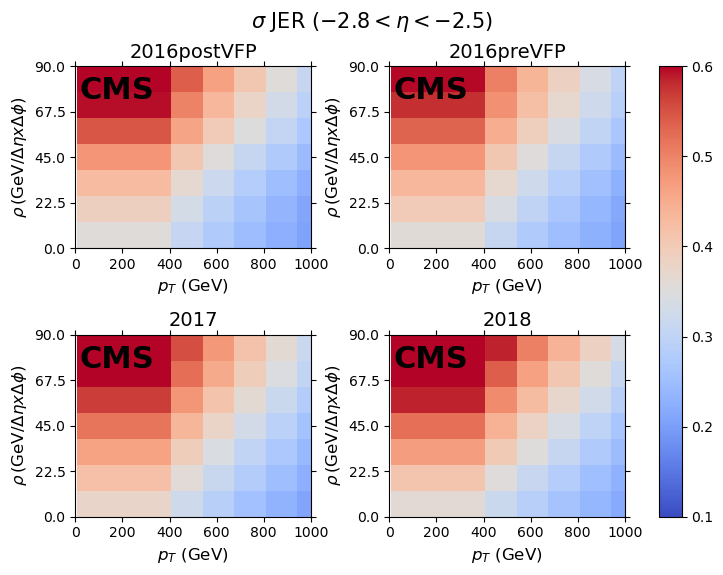

plots/sigma_JER/sigma_JER_-2.5_-2.3.png created.


<Figure size 640x480 with 0 Axes>

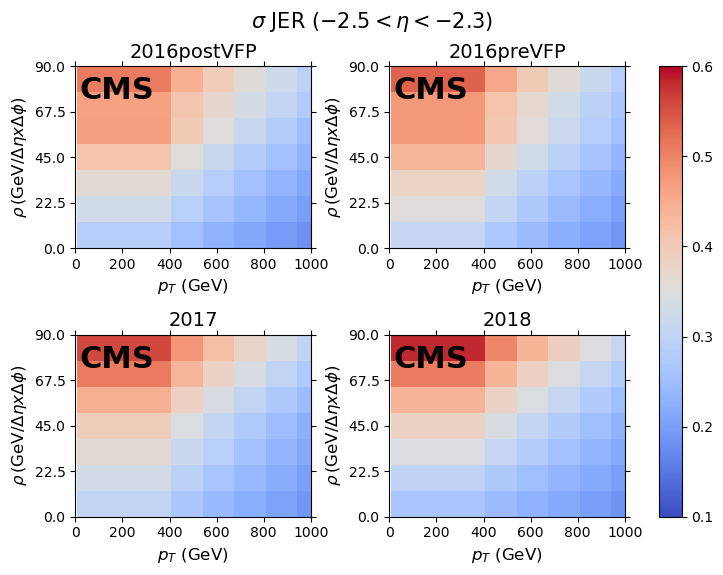

plots/sigma_JER/sigma_JER_-2.3_-2.1.png created.


<Figure size 640x480 with 0 Axes>

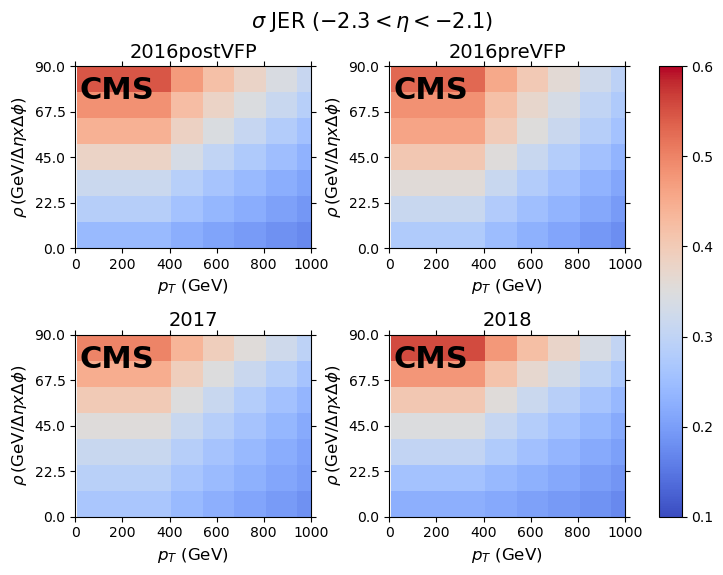

plots/sigma_JER/sigma_JER_-2.1_-1.9.png created.


<Figure size 640x480 with 0 Axes>

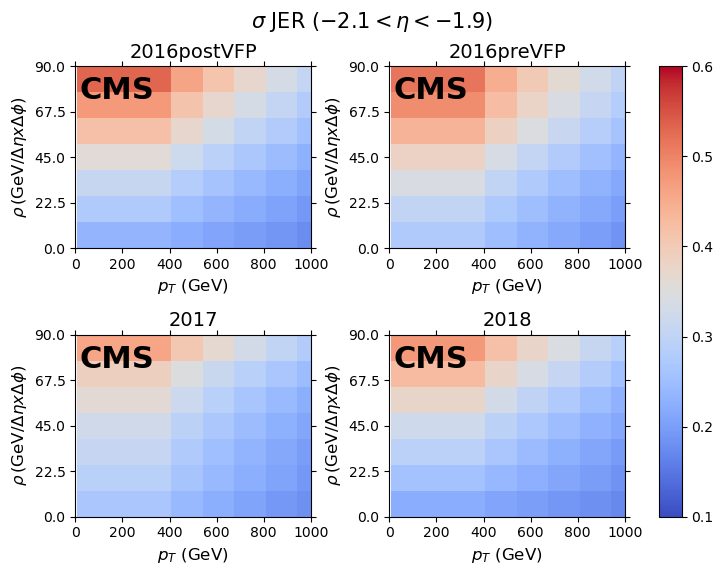

plots/sigma_JER/sigma_JER_-1.9_-1.7.png created.


<Figure size 640x480 with 0 Axes>

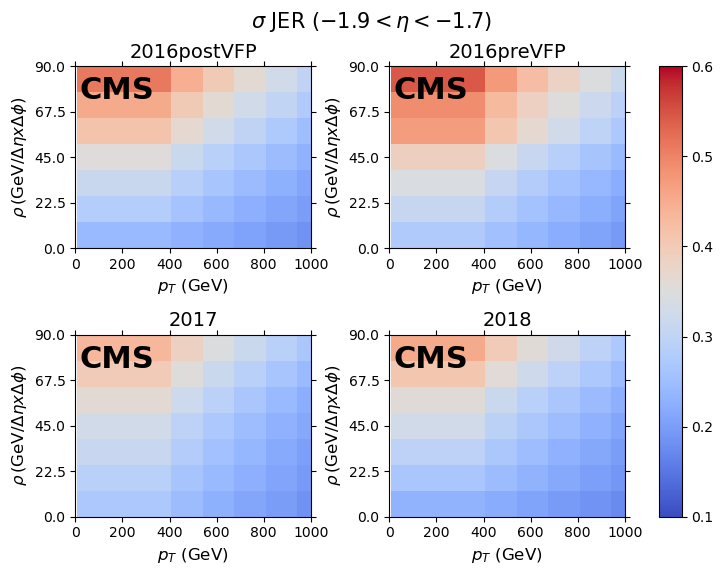

plots/sigma_JER/sigma_JER_-1.7_-1.3.png created.


<Figure size 640x480 with 0 Axes>

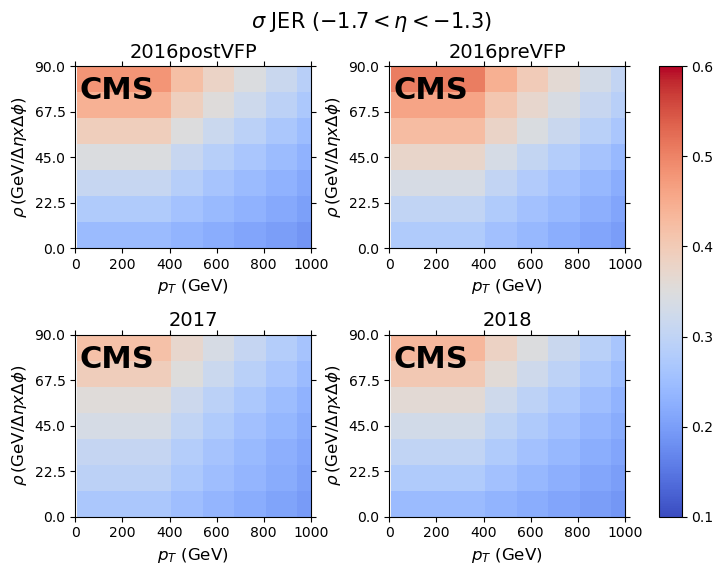

plots/sigma_JER/sigma_JER_-1.3_-1.1.png created.


<Figure size 640x480 with 0 Axes>

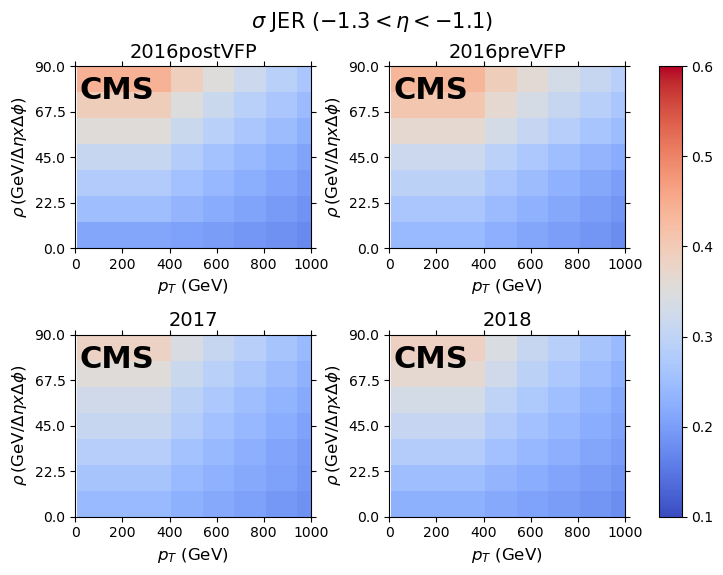

plots/sigma_JER/sigma_JER_-1.1_-0.8.png created.


<Figure size 640x480 with 0 Axes>

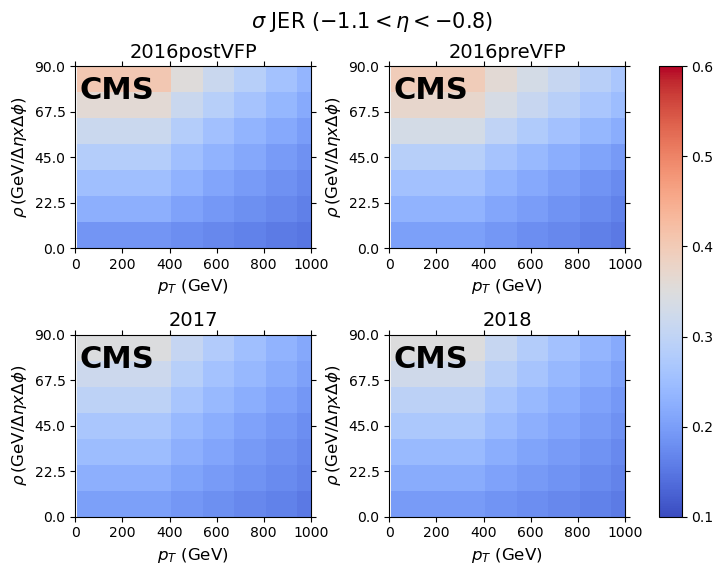

plots/sigma_JER/sigma_JER_-0.8_-0.5.png created.


<Figure size 640x480 with 0 Axes>

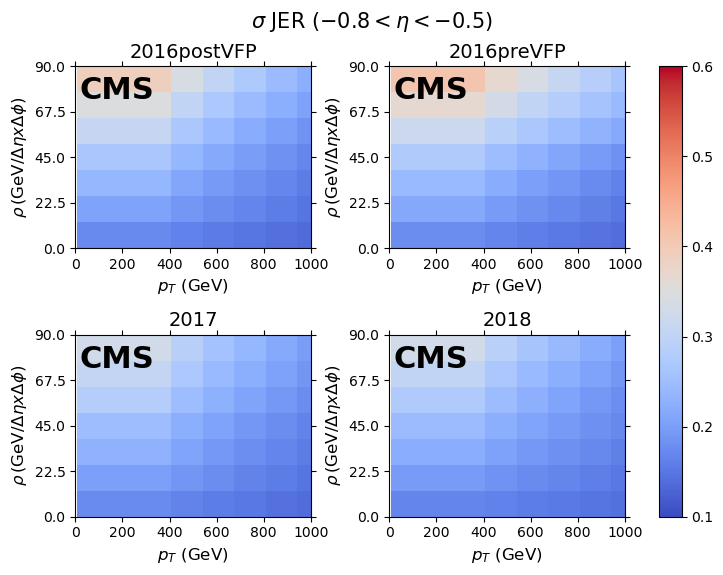

plots/sigma_JER/sigma_JER_-0.5_0.0.png created.


<Figure size 640x480 with 0 Axes>

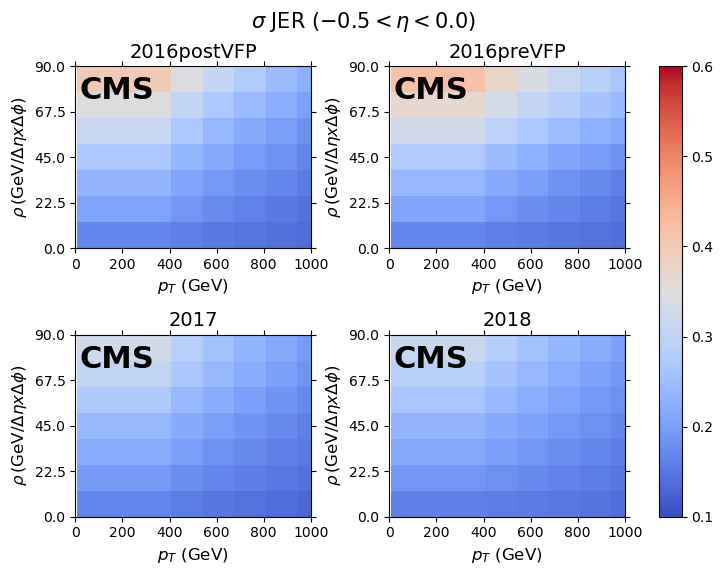

plots/sigma_JER/sigma_JER_0.0_0.5.png created.


<Figure size 640x480 with 0 Axes>

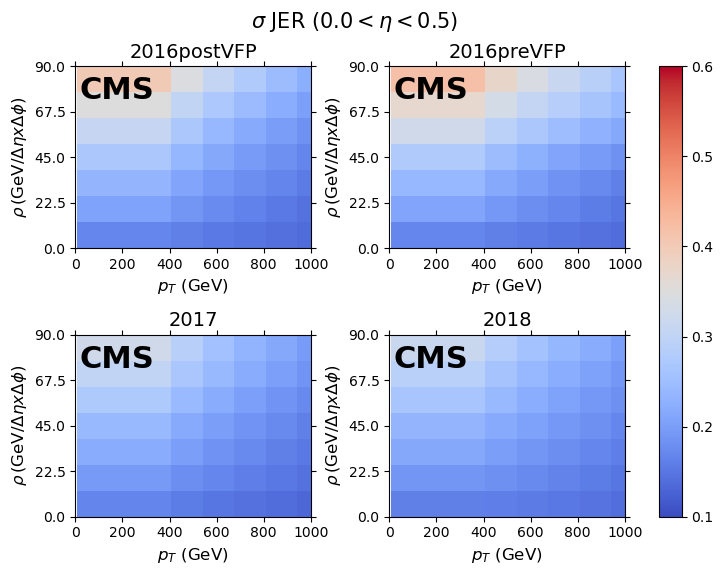

plots/sigma_JER/sigma_JER_0.5_0.8.png created.


<Figure size 640x480 with 0 Axes>

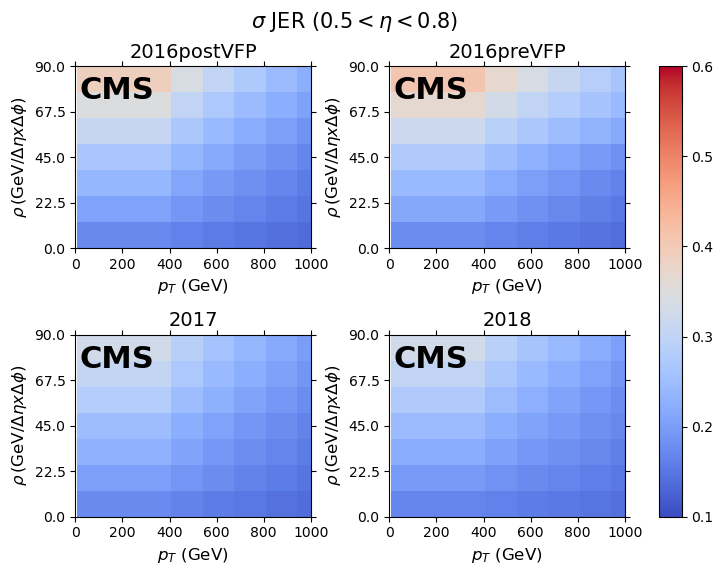

plots/sigma_JER/sigma_JER_0.8_1.1.png created.


<Figure size 640x480 with 0 Axes>

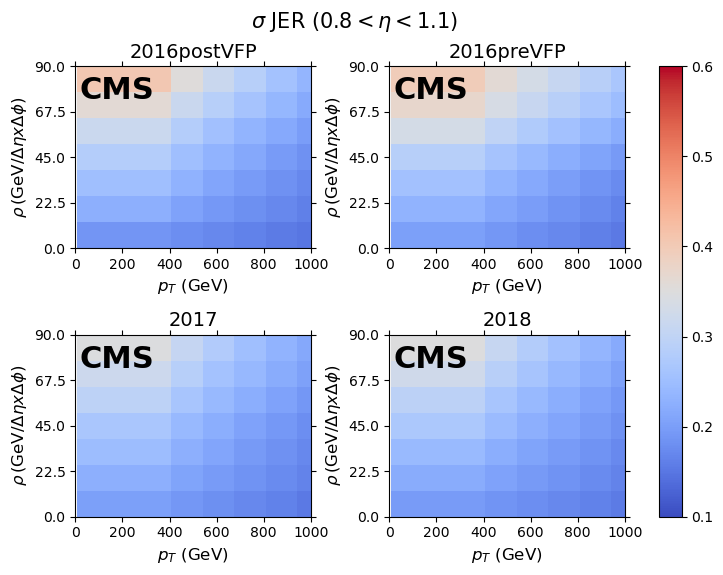

plots/sigma_JER/sigma_JER_1.1_1.3.png created.


<Figure size 640x480 with 0 Axes>

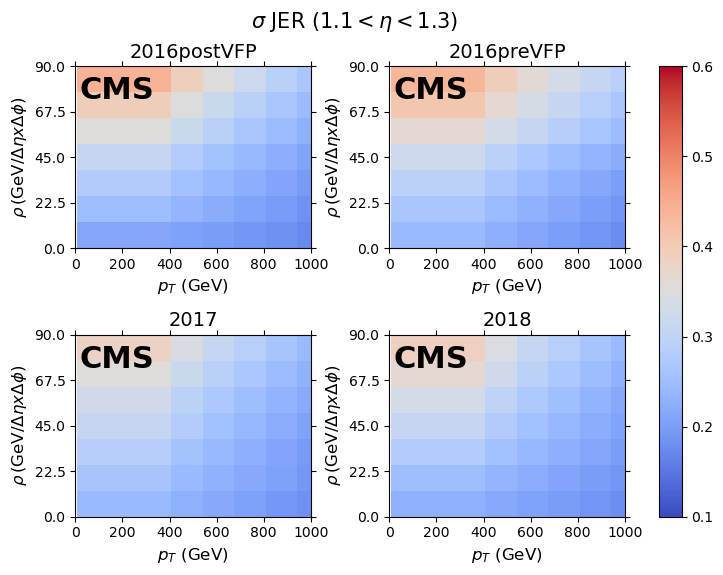

plots/sigma_JER/sigma_JER_1.3_1.7.png created.


<Figure size 640x480 with 0 Axes>

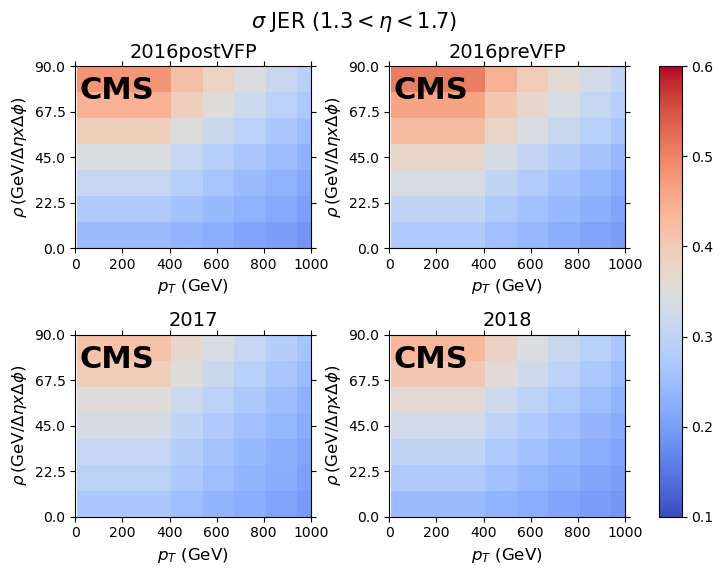

plots/sigma_JER/sigma_JER_1.7_1.9.png created.


<Figure size 640x480 with 0 Axes>

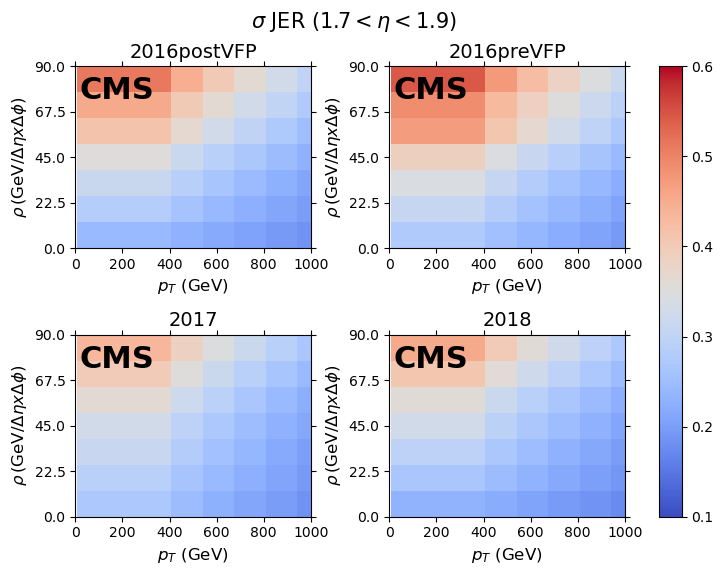

plots/sigma_JER/sigma_JER_1.9_2.1.png created.


<Figure size 640x480 with 0 Axes>

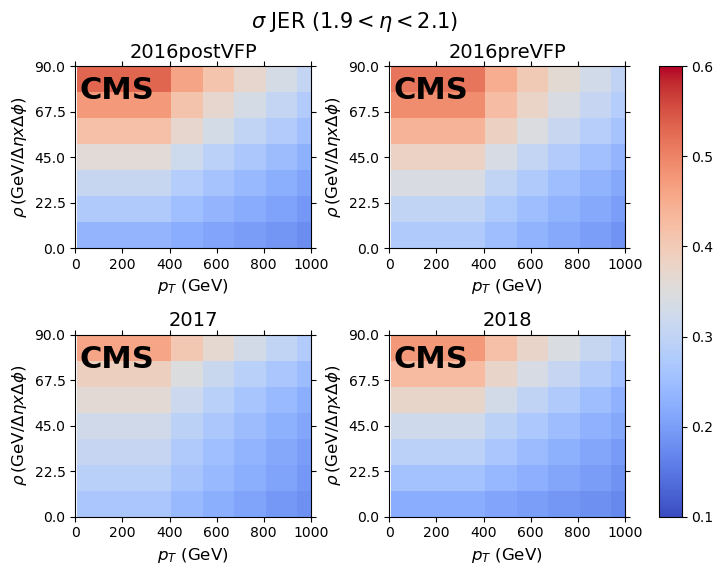

plots/sigma_JER/sigma_JER_2.1_2.3.png created.


<Figure size 640x480 with 0 Axes>

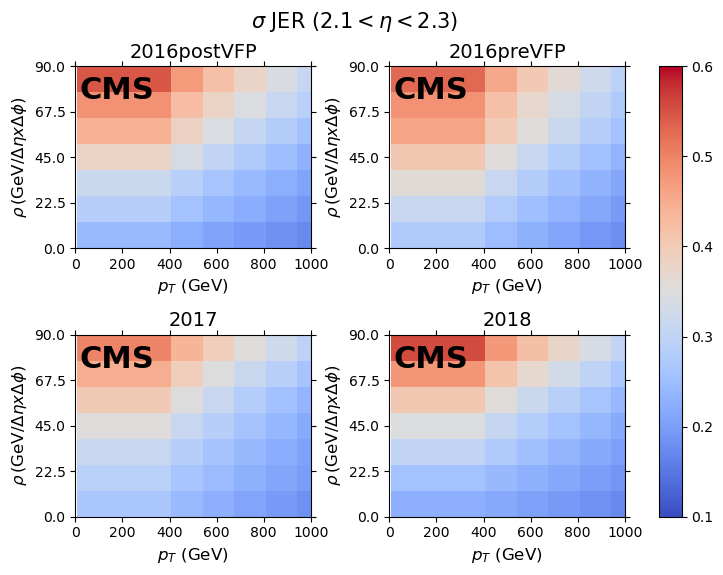

plots/sigma_JER/sigma_JER_2.3_2.5.png created.


<Figure size 640x480 with 0 Axes>

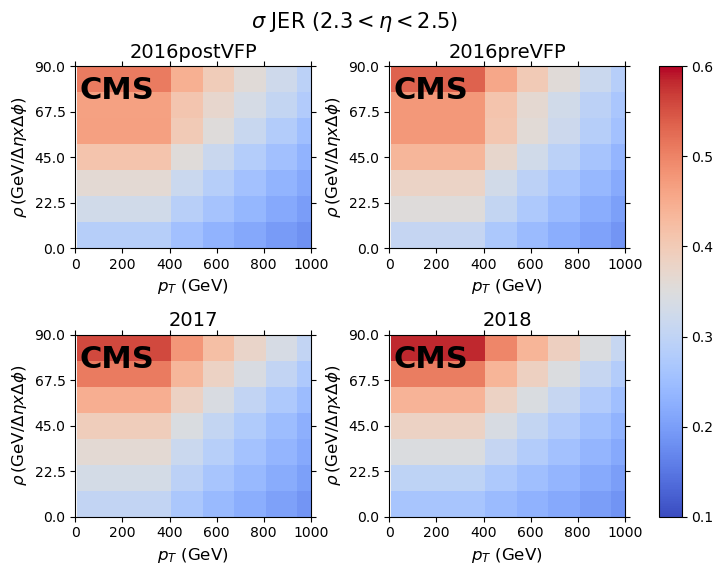

plots/sigma_JER/sigma_JER_2.5_2.8.png created.


<Figure size 640x480 with 0 Axes>

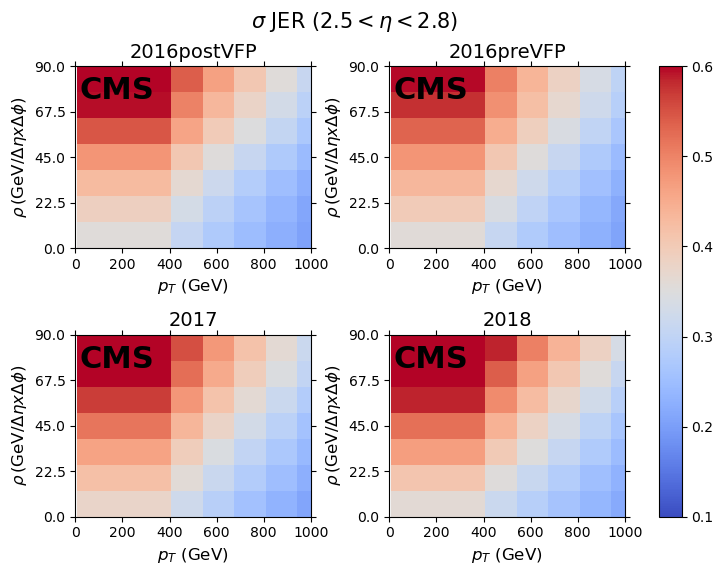

plots/sigma_JER/sigma_JER_2.8_3.0.png created.


<Figure size 640x480 with 0 Axes>

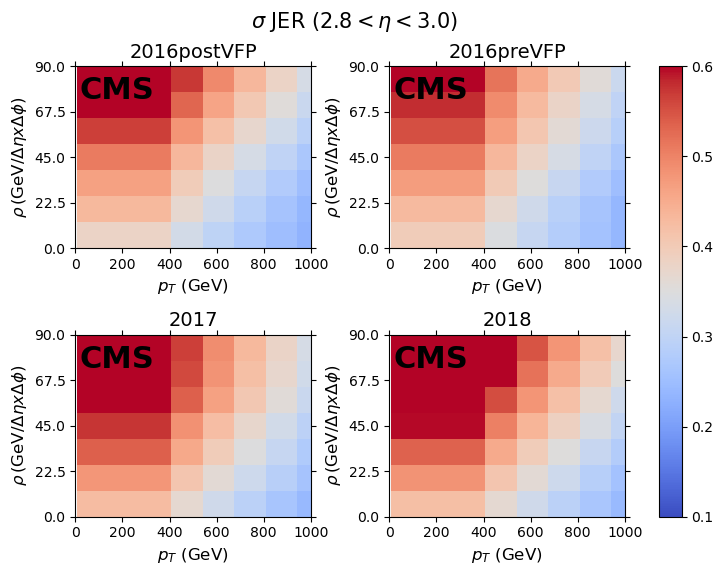

plots/sigma_JER/sigma_JER_3.0_3.2.png created.


<Figure size 640x480 with 0 Axes>

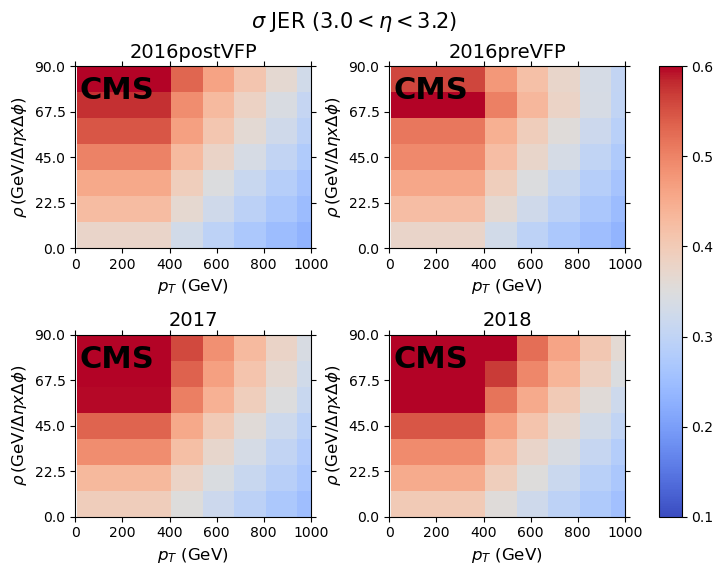

plots/sigma_JER/sigma_JER_3.2_4.7.png created.


<Figure size 640x480 with 0 Axes>

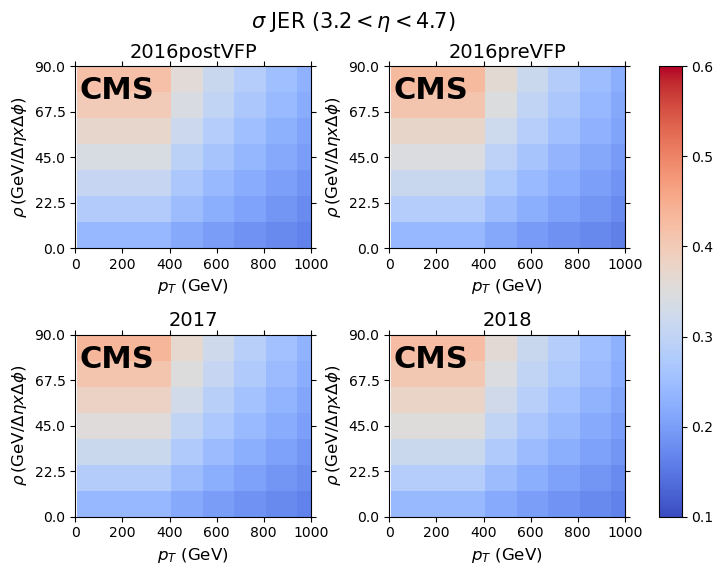

<Figure size 640x480 with 0 Axes>

In [15]:
plot_sigmajer_sf(df_sigmajer, "sigma JER")

In [16]:
print('Done!')

Done!
